Карпеченко Д.М., dz15, v.0.1, 23.11.2022

In [77]:
import numpy as np
import pandas as pd
from scipy import stats
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler as MMScaler
from sklearn.pipeline import Pipeline


#Снять ограничения на вывод колонок
pd.set_option('display.max_columns', None)
#Снять ограничения на вывод строк
pd.set_option('display.max_rows', 15)
data = pd.read_csv('D:\TeachMeSkills\DZ\dz15\Walmart.csv',sep = ',', decimal='.')


In [78]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [80]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [81]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'Holiday_Flag'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'CPI'}>],
       [<AxesSubplot:title={'center':'Unemployment'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

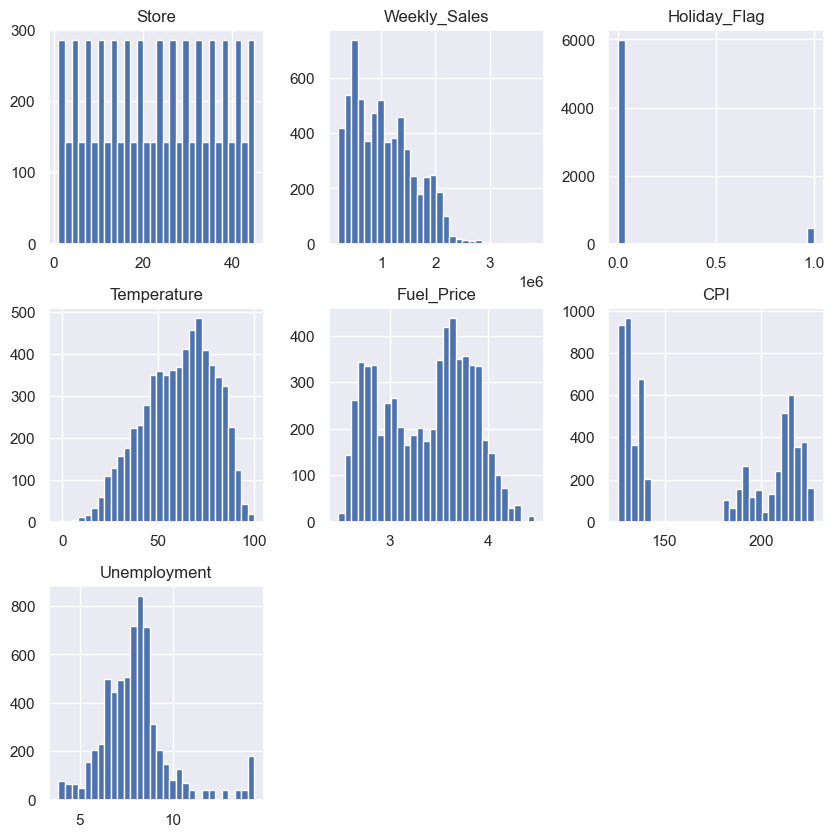

In [82]:
data.hist(bins = 30, figsize = (10, 10))

In [83]:
corr_matrix = data.corr()

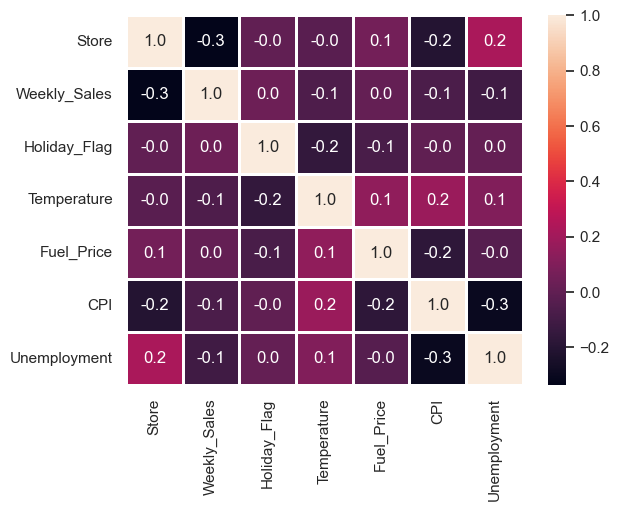

In [84]:
sns.heatmap(corr_matrix, annot=True, linewidths=1, fmt=".1f");

Не наблюдается сильных корреляций между данными

In [85]:
X=data[['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
Y=data['Weekly_Sales']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, train_size=0.7, random_state=42)

Проведем анализ на двух моделях:LinearRegression и RandomForestRegressor

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble

In [88]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

In [89]:
rf=ensemble.RandomForestRegressor(random_state=42)

In [90]:
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [91]:
pred_train_lin=model.predict(X_test)

In [92]:
pred_train_rf=rf.predict(X_test)

Построим график зависимости реальной цены от предсказанной для LinearRegression

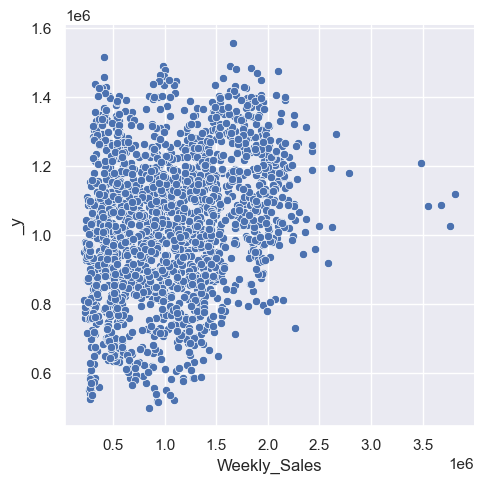

In [93]:
sns.set_theme()
sns.relplot(
    x=Y_test, y=pred_train_lin
)

Построим график зависимости реальной цены от предсказанной для RandomForestRegressor

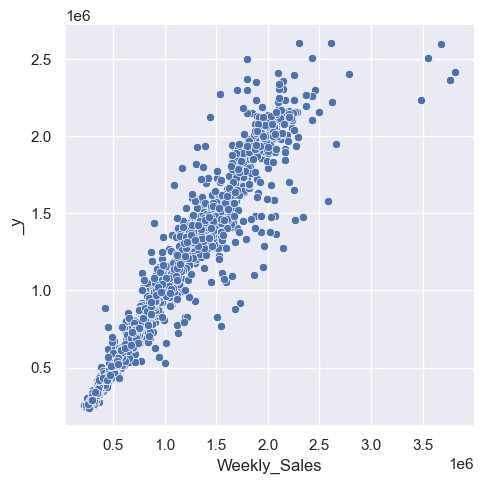

In [94]:
sns.set_theme()
sns.relplot(
    x=Y_test, y=pred_train_rf
)

Определим метрики для наших моделей

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [98]:
mae_lin=mean_absolute_error(Y_test,pred_train_lin)
mse_lin=mean_squared_error(Y_test,pred_train_lin)
rmse_lin=sqrt(mse_lin)
r2_score_lin=r2_score(Y_test,pred_train_lin)

In [99]:
mae_rf=mean_absolute_error(Y_test,pred_train_rf)
mse_rf=mean_squared_error(Y_test,pred_train_rf)
rmse_rf=sqrt(mse_rf)
r2_score_rf=r2_score(Y_test,pred_train_rf)

Для линейной регресии получили:

In [100]:
print('MAE: {:.3f}'.  format(mae_lin), "MSE: {:.3f}". format(mse_lin), "RMSE:{:.3f}". format(rmse_lin), "r2_score: {:.3f}".
      format(r2_score_lin))

MAE: 450776.467 MSE: 298575371107.266 RMSE:546420.508 r2_score: 0.066


Для RandomForestRegressor получили:

In [101]:
print('MAE: {:.3f}'.  format(mae_rf), "MSE: {:.3f}". format(mse_rf), "RMSE:{:.3f}". format(rmse_rf), "r2_score: {:.3f}".
      format(r2_score_rf))

MAE: 79181.228 MSE: 22092708348.323 RMSE:148636.161 r2_score: 0.931


# Выводы:

Видим по полученным данным, что RandomForestRegressor справился намного лучше - высокий R2-score и намного адекватнее метрики MAE, MSE, RMSE, чем у LinearRegression. Так же видим из графика, что для RandomForestRegressor с увеличением значения цены увеличивается ошибка предсказания

# P.S. Построил еще полиминомиальную модель, результаты средние между линейной регрессией и RandomForestRegressor

In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())
poly_model.fit(X_train, Y_train)
pred_train_poly=poly_model.predict(X_test)


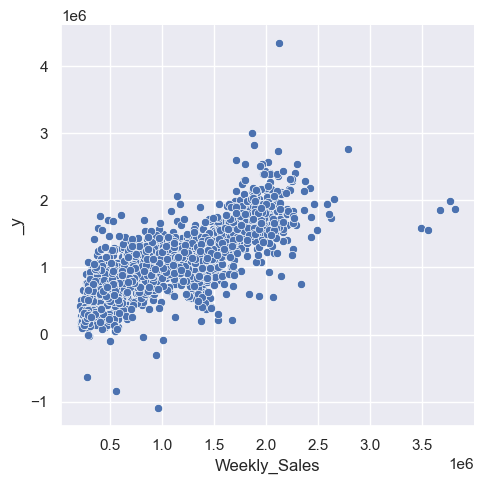

In [132]:
sns.set_theme()
sns.relplot(
    x=Y_test, y=pred_train_poly
)

In [133]:
mae_poly=mean_absolute_error(Y_test,pred_train_poly)
mse_poly=mean_squared_error(Y_test,pred_train_poly)
rmse_poly=sqrt(mse_poly)
r2_score_poly=r2_score(Y_test,pred_train_poly)

In [134]:
print('MAE: {:.3f}'.  format(mae_poly), "MSE: {:.3f}". format(mse_poly), "RMSE:{:.3f}". format(rmse_poly), "r2_score: {:.3f}".
      format(r2_score_poly))

MAE: 272971.279 MSE: 139393482931.203 RMSE:373354.366 r2_score: 0.564
